In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

from sklearn import datasets

In [2]:
data = datasets.load_wine()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df['class'] = data['target'].astype(str)
df['class'] = df['class'].astype('category')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
df['class']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,class
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [11]:
numcols = df.select_dtypes(['number']).columns
for i in numcols:
  df[i] = (df[i] - (0.999*df[i].min())) / (1.001*df[i].max() - (0.999*df[i].min()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.517961,0.315223,0.537652,0.458090,0.323224,0.453066,0.356051,0.437054,0.372184,0.322079,0.387870,0.490977,0.334178
std,0.212195,0.220495,0.146349,0.171783,0.154854,0.215450,0.210489,0.234468,0.180328,0.197565,0.185500,0.259569,0.224300
min,0.002883,0.000146,0.000725,0.000545,0.000759,0.000337,0.000072,0.000245,0.000129,0.000109,0.000390,0.000464,0.000198
25%,0.351171,0.170381,0.454158,0.340041,0.195919,0.262829,0.182353,0.264003,0.264780,0.165437,0.245887,0.244499,0.158679
50%,0.530869,0.222191,0.534175,0.458350,0.304341,0.473682,0.378331,0.395882,0.360874,0.290711,0.393998,0.552512,0.281902
75%,0.694884,0.462493,0.639532,0.561228,0.401921,0.626874,0.534271,0.579570,0.485323,0.419393,0.519790,0.695094,0.503774
max,0.996124,0.998855,0.998277,0.998457,0.998244,0.998664,0.998929,0.998757,0.998872,0.998892,0.998612,0.998538,0.998803


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

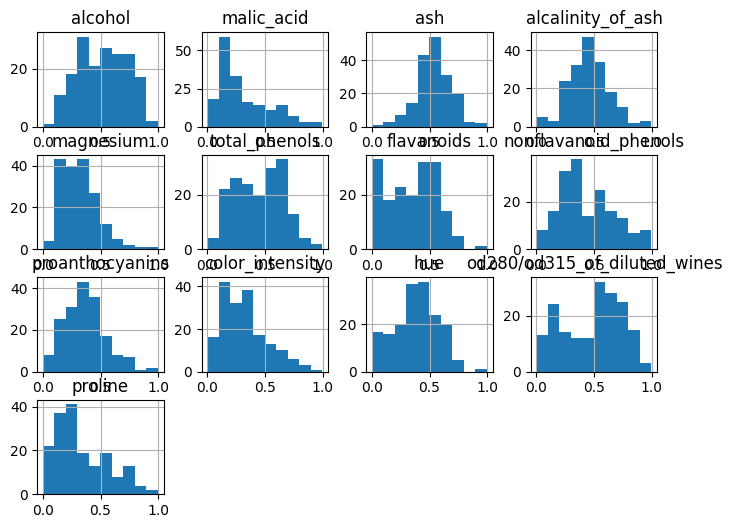

In [14]:
df.hist(bins=10, figsize=(8,6))

In [16]:
bins = [0.0, 0.25, 0.5, 0.75, 1.0]

for i in numcols:
  labels = [i+'[0,25]', i+'(25,50]', i+'(50,75]', i+'(75,100]']
  df[i] = pd.cut(df[i], bins=bins, labels=labels)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    category
 1   malic_acid                    178 non-null    category
 2   ash                           178 non-null    category
 3   alcalinity_of_ash             178 non-null    category
 4   magnesium                     178 non-null    category
 5   total_phenols                 178 non-null    category
 6   flavanoids                    178 non-null    category
 7   nonflavanoid_phenols          178 non-null    category
 8   proanthocyanins               178 non-null    category
 9   color_intensity               178 non-null    category
 10  hue                           178 non-null    category
 11  od280/od315_of_diluted_wines  178 non-null    category
 12  proline                       178 non-null    cate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
print(labels)

['proline[0,25]', 'proline(25,50]', 'proline(50,75]', 'proline(75,100]']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,"alcohol(75,100]","malic_acid[0,25]","ash(50,75]","alcalinity_of_ash(25,50]","magnesium(50,75]","total_phenols(50,75]","flavanoids(50,75]","nonflavanoid_phenols(25,50]","proanthocyanins(50,75]","color_intensity(25,50]","hue(25,50]","od280/od315_of_diluted_wines(75,100]","proline(50,75]",0
1,"alcohol(50,75]","malic_acid[0,25]","ash(25,50]","alcalinity_of_ash[0,25]","magnesium(25,50]","total_phenols(50,75]","flavanoids(50,75]","nonflavanoid_phenols[0,25]","proanthocyanins(25,50]","color_intensity(25,50]","hue(25,50]","od280/od315_of_diluted_wines(75,100]","proline(50,75]",0
2,"alcohol(50,75]","malic_acid(25,50]","ash(50,75]","alcalinity_of_ash(25,50]","magnesium(25,50]","total_phenols(50,75]","flavanoids(50,75]","nonflavanoid_phenols(25,50]","proanthocyanins(75,100]","color_intensity(25,50]","hue(25,50]","od280/od315_of_diluted_wines(50,75]","proline(50,75]",0
3,"alcohol(75,100]","malic_acid[0,25]","ash(50,75]","alcalinity_of_ash(25,50]","magnesium(25,50]","total_phenols(75,100]","flavanoids(50,75]","nonflavanoid_phenols[0,25]","proanthocyanins(50,75]","color_intensity(50,75]","hue(25,50]","od280/od315_of_diluted_wines(75,100]","proline(75,100]",0
4,"alcohol(50,75]","malic_acid(25,50]","ash(75,100]","alcalinity_of_ash(50,75]","magnesium(50,75]","total_phenols(50,75]","flavanoids(25,50]","nonflavanoid_phenols(25,50]","proanthocyanins(25,50]","color_intensity(25,50]","hue(25,50]","od280/od315_of_diluted_wines(50,75]","proline(25,50]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,"alcohol(50,75]","malic_acid(75,100]","ash(50,75]","alcalinity_of_ash(50,75]","magnesium(25,50]","total_phenols[0,25]","flavanoids[0,25]","nonflavanoid_phenols(50,75]","proanthocyanins[0,25]","color_intensity(50,75]","hue[0,25]","od280/od315_of_diluted_wines[0,25]","proline(25,50]",2
174,"alcohol(50,75]","malic_acid(50,75]","ash(50,75]","alcalinity_of_ash(50,75]","magnesium(25,50]","total_phenols(25,50]","flavanoids[0,25]","nonflavanoid_phenols(50,75]","proanthocyanins(25,50]","color_intensity(50,75]","hue[0,25]","od280/od315_of_diluted_wines[0,25]","proline(25,50]",2
175,"alcohol(50,75]","malic_acid(50,75]","ash(25,50]","alcalinity_of_ash(25,50]","magnesium(50,75]","total_phenols[0,25]","flavanoids[0,25]","nonflavanoid_phenols(50,75]","proanthocyanins(25,50]","color_intensity(75,100]","hue[0,25]","od280/od315_of_diluted_wines[0,25]","proline(25,50]",2
176,"alcohol(50,75]","malic_acid(25,50]","ash(50,75]","alcalinity_of_ash(25,50]","magnesium(50,75]","total_phenols[0,25]","flavanoids[0,25]","nonflavanoid_phenols(75,100]","proanthocyanins(25,50]","color_intensity(50,75]","hue[0,25]","od280/od315_of_diluted_wines[0,25]","proline(25,50]",2


In [19]:
my_df = pd.DataFrame()
for i in df:
  for j in df[i].unique():
    l = []
    for r in range(len(df)):
      if df[i][r] == j:
        l.append(True)
      else:
        l.append(False)
    my_df[j] = l

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
my_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"alcohol(75,100]","alcohol(50,75]","alcohol(25,50]","alcohol[0,25]","malic_acid[0,25]","malic_acid(25,50]","malic_acid(50,75]","malic_acid(75,100]","ash(50,75]","ash(25,50]",...,"od280/od315_of_diluted_wines(50,75]","od280/od315_of_diluted_wines(25,50]","od280/od315_of_diluted_wines[0,25]","proline(50,75]","proline(75,100]","proline(25,50]","proline[0,25]",0,1,2
0,True,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
1,False,True,False,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2,False,True,False,False,False,True,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
3,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
4,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,True,True,False,...,False,False,True,False,False,True,False,False,False,True
174,False,True,False,False,False,False,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
175,False,True,False,False,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,False,True
176,False,True,False,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True


In [21]:
frequent_itemsets = apriori(my_df, min_support=0.3, use_colnames=True)
print("Itemsets Frecuentes (Apriori):")
print(frequent_itemsets)

Itemsets Frecuentes (Apriori):
     support                                      itemsets
0   0.393258                              (alcohol(50,75])
1   0.365169                              (alcohol(25,50])
2   0.561798                            (malic_acid[0,25])
3   0.573034                                  (ash(50,75])
4   0.348315                                  (ash(25,50])
5   0.544944                    (alcalinity_of_ash(25,50])
6   0.337079                    (alcalinity_of_ash(50,75])
7   0.528090                            (magnesium(25,50])
8   0.353933                             (magnesium[0,25])
9   0.376404                        (total_phenols(50,75])
10  0.370787                           (flavanoids(25,50])
11  0.337079                            (flavanoids[0,25])
12  0.365169                 (nonflavanoid_phenols(25,50])
13  0.567416                      (proanthocyanins(25,50])
14  0.404494                      (color_intensity(25,50])
15  0.410112             

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1),"(color_intensity[0,25])",0.398876,0.410112,0.348315,0.873239,2.129269,0.184730,4.653558,0.882273
1,"(color_intensity[0,25])",(1),0.410112,0.398876,0.348315,0.849315,2.129269,0.184730,3.989275,0.899078
2,(1),"(proline[0,25])",0.398876,0.438202,0.303371,0.760563,1.735645,0.128582,2.346332,0.705088
3,"(proline[0,25])",(1),0.438202,0.398876,0.303371,0.692308,1.735645,0.128582,1.953652,0.754444


In [30]:
print('Reglas identificadas: ', len(rules))
print(rules)

Reglas identificadas:  4
               antecedents              consequents  antecedent support  \
0                      (1)  (color_intensity[0,25])            0.398876   
1  (color_intensity[0,25])                      (1)            0.410112   
2                      (1)          (proline[0,25])            0.398876   
3          (proline[0,25])                      (1)            0.438202   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.410112  0.348315    0.873239  2.129269  0.184730    4.653558   
1            0.398876  0.348315    0.849315  2.129269  0.184730    3.989275   
2            0.438202  0.303371    0.760563  1.735645  0.128582    2.346332   
3            0.398876  0.303371    0.692308  1.735645  0.128582    1.953652   

   zhangs_metric  
0       0.882273  
1       0.899078  
2       0.705088  
3       0.754444  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
import re

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
def draw_network(rules, rules_to_show):
  network = nx.DiGraph()

  for i in range(rules_to_show):
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']:
      network.add_nodes_from([antecedents])
      network.add_edge(antecedents, "R"+str(i), weight=2)

    for consequents in rules.iloc[i]['consequents']:
      network.add_nodes_from([consequents])
      network.add_edge("R"+str(i), consequents, weight = 2)

  color_map = []

  for node in network:
    if re.compile("^[R]\\d+$").fullmatch(node) != None:
      color_map.append('black')

    else:
      color_map.append('orange')

  pos = nx.spring_layout(network, k=16, scale=1)

  nx.draw(network, pos, node_color = color_map, font_size=8)

  for p in pos:
    pos[p][1] += .12

  nx.draw_networkx_labels(network, pos)
  plt.title("Grafo de las Reglas de Asociacion")
  plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


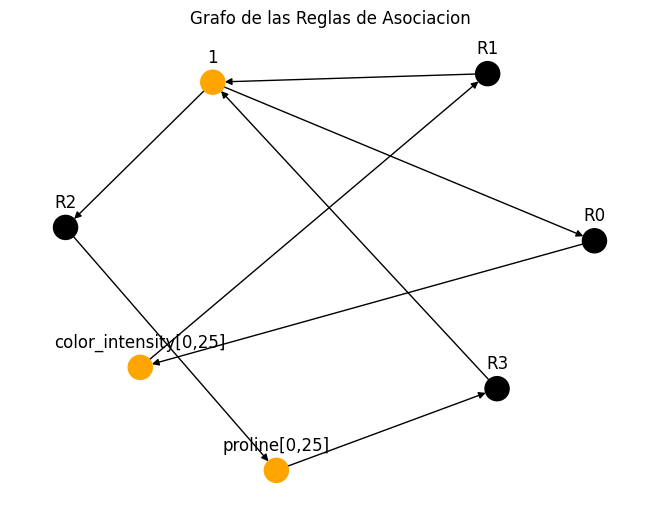

In [35]:
draw_network(rules, len(rules))

In [36]:
#FP-Growth
frequent_itemsetsFP = fpgrowth(my_df, min_support=0.3, use_colnames=True)

rulesFP = association_rules(frequent_itemsetsFP, metric='lift', min_threshold = 1.5)
display(rulesFP.head())
print("Reglas identificadas: ", len(rulesFP))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1),"(color_intensity[0,25])",0.398876,0.410112,0.348315,0.873239,2.129269,0.184730,4.653558,0.882273
1,"(color_intensity[0,25])",(1),0.410112,0.398876,0.348315,0.849315,2.129269,0.184730,3.989275,0.899078
2,(1),"(proline[0,25])",0.398876,0.438202,0.303371,0.760563,1.735645,0.128582,2.346332,0.705088
3,"(proline[0,25])",(1),0.438202,0.398876,0.303371,0.692308,1.735645,0.128582,1.953652,0.754444


Reglas identificadas:  4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


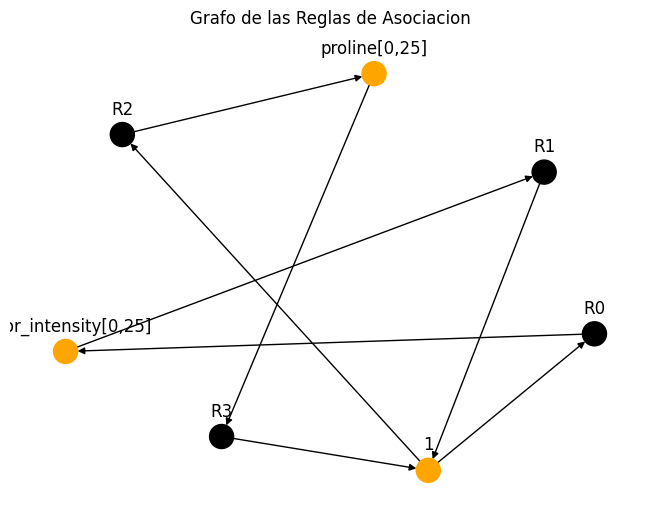

In [37]:
draw_network(rulesFP, len(rulesFP))

In [38]:
#ECLAT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
https://hands-on.cloud/implementation-of-eclat-algorithm-using-python/